In [7]:
import numpy as np
import pandas as pd
import sqlite3 as sq3

In [2]:
data = np.random.standard_normal((1000000, 5)).round(5)

In [5]:
mkdir data

mkdir: data: File exists


In [10]:
path = './data/'
filename = path + 'numbs'

In [11]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'

In [12]:
con = sq3.Connection(filename+'.db')

In [13]:
con.execute(query)

In [14]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 16.6 s, sys: 414 ms, total: 17 s
Wall time: 17.3 s


In [16]:
ll $path*

-rw-r--r--  1 shaolongchen  staff  52633600 May 24 21:43 ./data/numbs.db


In [18]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print temp[:2]
temp = 0.0

[(0.26781, -1.73472, 1.14267, -0.6147, -1.25152), (-1.06828, 2.78666, -1.81353, 0.40956, 1.20871)]
CPU times: user 3.03 s, sys: 717 ms, total: 3.75 s
Wall time: 4.83 s


In [25]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 1.27 s, sys: 128 ms, total: 1.4 s
Wall time: 1.47 s


(-4.5, 0.5)

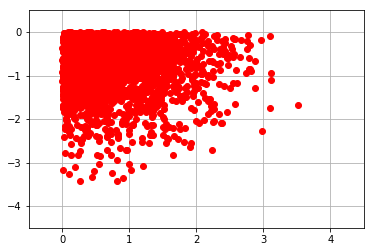

In [26]:
res = res[::100]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)

In [27]:
import pandas.io.sql as pds

In [28]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

CPU times: user 3.29 s, sys: 260 ms, total: 3.55 s
Wall time: 3.62 s


In [29]:
data.head()

,No1,No2,No3,No4,No5
0,0.26781,-1.73472,1.14267,-0.61470,-1.25152
1,-1.06828,2.78666,-1.81353,0.40956,1.20871
2,-0.47255,-0.63596,0.77593,0.00360,0.04718
3,0.18547,-1.43104,-0.68976,-0.72659,0.88064
4,-1.39081,0.55185,1.38024,-0.09557,-1.22229


In [30]:
%time data[(data['No1']>0) & (data['No2']<0)].head()

CPU times: user 21.8 ms, sys: 12 ms, total: 33.9 ms
Wall time: 112 ms


,No1,No2,No3,No4,No5
0,0.26781,-1.73472,1.14267,-0.61470,-1.25152
3,0.18547,-1.43104,-0.68976,-0.72659,0.88064
6,2.66637,-0.89171,0.10932,0.10212,1.20948
23,0.20920,-0.44922,0.64209,0.07214,-0.48809
24,0.53114,-0.54435,-0.67037,-0.60511,-0.71627


In [31]:
%%time
res = data[['No1', 'No2']][((data['No1']>0.5) | (data['No1']<-0.5)) & ((data['No2']<-1) | (data['No2']>1))]

CPU times: user 27 ms, sys: 13.1 ms, total: 40.1 ms
Wall time: 791 ms


(-4.7543600000000001,
 5.0924000000000005,
 -4.8347964999999995,
 4.9513864999999999)

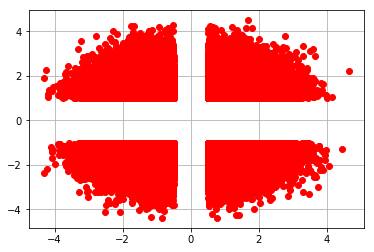

In [32]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True)
plt.axis('tight')

In [33]:
h5s = pd.HDFStore(filename+'.h5s', 'w')

In [34]:
%time h5s['data'] = data

CPU times: user 65.6 ms, sys: 124 ms, total: 189 ms
Wall time: 441 ms


In [35]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./data/numbs.h5s
/data            frame        (shape->[1000000,5])

In [36]:
h5s.close()

In [37]:
%%time
h5s = pd.HDFStore(filename+'.h5s', 'r')
temp = h5s['data']
h5s.close()

CPU times: user 12 ms, sys: 52.9 ms, total: 64.9 ms
Wall time: 573 ms


In [39]:
np.allclose(np.array(temp), np.array(data))

True

In [40]:
temp = 0.0

In [41]:
ll $path*

-rw-r--r--  1 shaolongchen  staff  52633600 May 24 21:43 ./data/numbs.db
-rw-r--r--  1 shaolongchen  staff  48007208 May 24 22:00 ./data/numbs.h5s


In [42]:
%time data.to_csv(filename+'.csv')

CPU times: user 4.19 s, sys: 267 ms, total: 4.45 s
Wall time: 4.73 s


CPU times: user 2.02 s, sys: 177 ms, total: 2.19 s
Wall time: 2.99 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113abee50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121951a50>]], dtype=object)

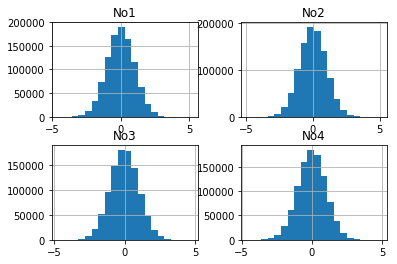

In [43]:
%%time
pd.read_csv(filename+'.csv')[['No1', 'No2', 'No3', 'No4']].hist(bins=20)

In [44]:
%time data[:100000].to_excel(filename+'.xlsx')

CPU times: user 29.5 s, sys: 733 ms, total: 30.2 s
Wall time: 32 s


CPU times: user 18.1 s, sys: 390 ms, total: 18.5 s
Wall time: 19.4 s


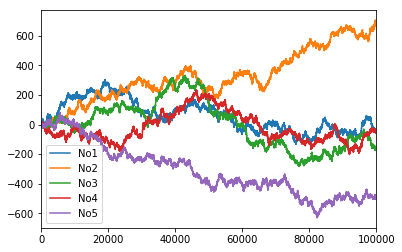

In [45]:
%time pd.read_excel(filename+'.xlsx', 'Sheet1').cumsum().plot()

In [46]:
ll $path*

-rw-r--r--  1 shaolongchen  staff  48834156 May 24 22:04 ./data/numbs.csv
-rw-r--r--  1 shaolongchen  staff  52633600 May 24 21:43 ./data/numbs.db
-rw-r--r--  1 shaolongchen  staff  48007208 May 24 22:00 ./data/numbs.h5s
-rw-r--r--  1 shaolongchen  staff   4418474 May 24 22:07 ./data/numbs.xlsx


In [47]:
rm -f $path*